In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from peewee import *
import pandas as pd
db = MySQLDatabase('scraping_results', 
                   user='scraper', 
                   password='scraper',
                   host='127.0.0.1', 
                   port=3306)

In [2]:
data = pd.read_sql("""
select a.affitto, d.*
from dettaglio as d
join annuncio as a
on d.url_id = a.url_id
#where d.arricchito and a.provincia = 'Bologna'
""", db)

In [7]:
data.shape

(15967, 38)

In [8]:
data.describe()

,affitto,id,latitudine,longitudine,prezzo,spese_condominio,superficie,ascensore,piani_totali,climatizzato,kwh,annuncio_id,immobile_garantito,arricchito
count,15967.000000,15967.000000,15967.000000,15967.000000,1.596700e+04,1.596700e+04,15967.000000,15967.0,15967.000000,15967.000000,15967.000000,15967.000000,15967.000000,15967.0
mean,0.164026,14756.754180,44.487620,11.350041,2.208854e+05,1.919509e+04,208.843803,0.0,2.637628,0.461076,197.374046,35352.144423,0.202355,1.0
std,0.370311,21078.473196,0.121547,0.156991,2.839639e+05,2.418650e+06,3363.886637,0.0,2.447562,0.498498,4353.357719,87064.582147,0.401768,0.0
min,0.000000,1.000000,44.097840,10.831740,0.000000e+00,-1.000000e+00,0.000000,0.0,0.000000,0.000000,-1.000000,1.000000,0.000000,1.0
25%,0.000000,4365.500000,44.448110,11.267590,7.500000e+04,-1.000000e+00,70.000000,0.0,2.000000,0.000000,-1.000000,4366.500000,0.000000,1.0
50%,0.000000,8687.000000,44.492260,11.347480,1.740000e+05,-1.000000e+00,100.000000,0.0,2.000000,0.000000,127.590000,8688.000000,0.000000,1.0
75%,0.000000,13038.500000,44.533895,11.404950,2.950000e+05,5.000000e+01,150.000000,0.0,3.000000,1.000000,175.000000,13039.500000,0.000000,1.0
max,1.000000,79007.000000,44.797050,11.822703,1.907600e+07,3.056220e+08,220000.000000,0.0,175.000000,1.000000,390970.000000,394846.000000,1.000000,1.0


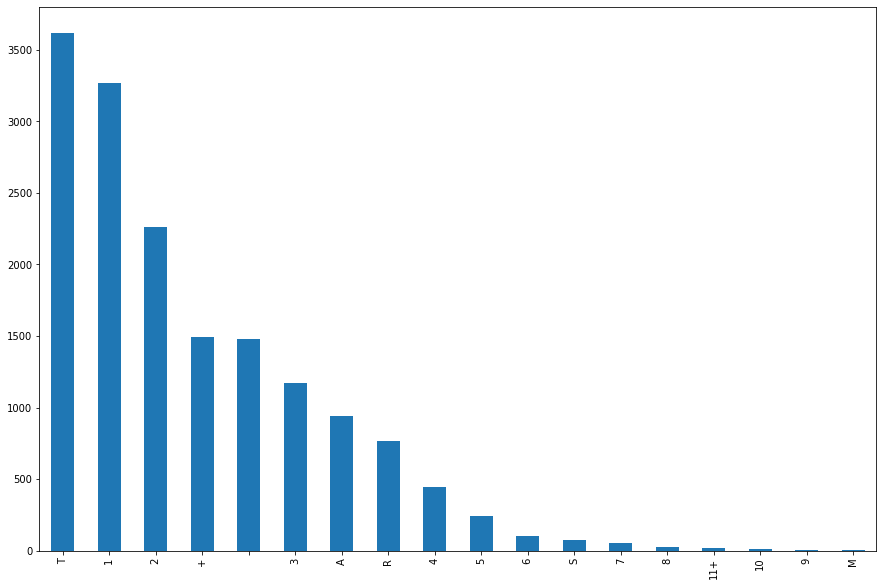

In [9]:
(data['piano'].value_counts()).plot.bar(figsize=(15, 10))

In [10]:
data['affitto'].value_counts()

0    13348
1     2619
Name: affitto, dtype: int64

In [51]:
(data['kwh'].value_counts()).plot.bar(figsize=(15, 10))

Error in callback <function flush_figures at 0x7f16e56fcae8> (for post_execute):


KeyboardInterrupt: 

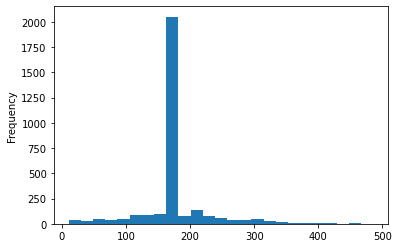

In [9]:
(data.query('kwh>10 & kwh<500'))['kwh'].plot.hist(bins=25)

In [11]:
pd.crosstab(index = data['locali'], columns = data['classe_energetica'])

classe_energetica,,A,A+,A1,A2,A3,A4,B,C,D,E,F,G
locali,,,,,,,,,,,,,
,164,2,2,0,1,1,1,3,5,8,7,34,74
1,216,15,21,24,10,23,22,26,23,57,60,94,313
1-2,1,0,0,0,0,0,0,0,0,0,0,0,0
1-3,1,0,0,0,0,0,0,1,0,0,0,0,0
1-4,3,0,0,0,0,0,0,0,0,0,0,0,0
1-5,1,0,0,0,0,0,1,0,0,0,0,0,0
1-5+,0,0,0,0,1,0,0,0,0,0,0,0,0
2,536,56,57,23,18,13,21,59,70,129,220,310,825
2-4,3,1,0,0,0,0,1,0,0,0,0,0,0


In [30]:
clean_dataset = data.copy()
print('N. obs: ',clean_dataset.shape[0])
clean_dataset['affitto'].value_counts()

N. obs:  4944


0    3261
1    1683
Name: affitto, dtype: int64

In [31]:
clean_dataset = clean_dataset.query('stato != ""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(4707, 38)


0    3121
1    1586
Name: affitto, dtype: int64

In [32]:
clean_dataset = clean_dataset.query('classe_energetica != ""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(3599, 38)


0    2317
1    1282
Name: affitto, dtype: int64

clean_dataset = clean_dataset.query('kwh > 0')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

In [33]:
clean_dataset = clean_dataset.query('tipo_immobile !=""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(3592, 38)


0    2310
1    1282
Name: affitto, dtype: int64

In [34]:
clean_dataset = clean_dataset.query('locali !=""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(3564, 38)


0    2296
1    1268
Name: affitto, dtype: int64

In [35]:
clean_dataset = clean_dataset.query('piano !=""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(3428, 38)


0    2195
1    1233
Name: affitto, dtype: int64

In [36]:
clean_dataset = clean_dataset.query('anno_costruzione >="1700"')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(2365, 38)


0    1736
1     629
Name: affitto, dtype: int64

In [37]:
clean_dataset = clean_dataset.query('riscaldamento !=""')
print(clean_dataset.shape)
clean_dataset['affitto'].value_counts()

(2330, 38)


0    1706
1     624
Name: affitto, dtype: int64

In [38]:
clean_dataset[['prezzo', 'affitto', "tipo_immobile",'tipo_proprietà', 
               'spese_condominio', 'superficie', 'piano', 'piani_totali', 
               'locali', 'climatizzato', 'bagni', 'posto_auto', 'anno_costruzione', 
               'stato', 'riscaldamento', 'classe_energetica', 'kwh', 'agenzia', 
               'riscaldamento', 'classe_energetica', 'kwh']]

,prezzo,affitto,tipo_immobile,tipo_proprietà,spese_condominio,superficie,piano,piani_totali,locali,climatizzato,...,posto_auto,anno_costruzione,stato,riscaldamento,classe_energetica,kwh,agenzia,riscaldamento,classe_energetica,kwh
0,780000,0,Appartamento,"Intera proprietà, classe immobile signorile",350,210,1,2,5+,1,...,"2 in garage/box, 3 all'esterno",1960,Ottimo / Ristrutturato,"Centralizzato, a radiatori, alimentato a metano",E,175.00,Immobiliare Margherita Marini,"Centralizzato, a radiatori, alimentato a metano",E,175.00
1,249000,0,Appartamento,"Intera proprietà, classe immobile media",150,115,5,5,5,1,...,,1974,Ottimo / Ristrutturato,"Centralizzato, a radiatori, alimentato a metano",G,175.00,TEMPOCASA Bologna San Donnino,"Centralizzato, a radiatori, alimentato a metano",G,175.00
2,132000,0,Appartamento,"Intera proprietà, classe immobile media",30,50,T,1,3,0,...,,1930,Buono / Abitabile,"Autonomo, a radiatori, alimentato a metano",G,175.00,TEMPOCASA Casalecchio di Reno Croce,"Autonomo, a radiatori, alimentato a metano",G,175.00
3,137000,0,Appartamento,"Intera proprietà, classe immobile signorile",40,45,T,3,2,1,...,1 all'esterno,2012,Ottimo / Ristrutturato,"Centralizzato, a radiatori, alimentato a gas",A1,3.51,Bologna Immobili - RE,"Centralizzato, a radiatori, alimentato a gas",A1,3.51
4,157500,0,Appartamento,"Intera proprietà, classe immobile media",1,45,1,1,1,1,...,,2020,Nuovo / In costruzione,"Autonomo, ad aria, alimentato a fotovoltaico",A3,3.51,IMMOBILIARE SAN LAZZARO,"Autonomo, ad aria, alimentato a fotovoltaico",A3,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933,750,1,Appartamento,"Intera proprietà, classe immobile signorile",180,45,1,15,2,1,...,,2003,Ottimo / Ristrutturato,"Centralizzato, ad aria, alimentato a metano",E,165.38,Studio Immobiliare San Vitale,"Centralizzato, ad aria, alimentato a metano",E,165.38
4935,890,1,Appartamento,"Intera proprietà, classe immobile media",70,55,1,4,2,1,...,,1975,Ottimo / Ristrutturato,"Autonomo, a radiatori, alimentato a metano",E,175.00,Studio Universal,"Autonomo, a radiatori, alimentato a metano",E,175.00
4936,111,1,Appartamento,"Intera proprietà, classe immobile media",370,135,4,6,5+,0,...,,1950,Buono / Abitabile,"Centralizzato, a pavimento, alimentato a gas",G,175.00,Immobiliare SB,"Centralizzato, a pavimento, alimentato a gas",G,175.00
4938,1030,1,Appartamento,"Intera proprietà, classe immobile signorile",60,70,3,4,3,1,...,"1 in garage/box, 1 all'esterno",2011,Ottimo / Ristrutturato,"Autonomo, a radiatori, alimentato a metano",B,52.48,IMMOBILIARE GIOVETTI,"Autonomo, a radiatori, alimentato a metano",B,52.48


In [47]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

from imblearn.over_sampling import ADASYN

import numpy as np
import seaborn as sn


import matplotlib.pyplot as plt


In [4]:
class model_summary:
    
    def __init__(self, X_train_set, X_test_set, y_train_set, y_test_set):
        self.X_train_set = X_train_set
        self.y_train_set = y_train_set
        self.X_test_set = X_test_set
        self.y_test_set = y_test_set
        
    def evaluate(self, model):
        print('Train model score: %f' % model.score(self.X_train_set, self.y_train_set))
        print('Test model score: %f' % model.score(self.X_test_set, self.y_test_set))
        y_pred = model.predict(self.X_test_set)
        print('-----')
       # print('Confusion matrix')
        
        #ct_df = pd.DataFrame({'test': self.y_test_set, 'pred':  y_pred})

        #print(pd.crosstab(index = ct_df['test'], columns = ct_df['pred']))
        #print('-----')
        #print('classification_report')
        #print(classification_report(self.y_test_set, y_pred))

        y_prob = model.predict_proba(self.X_test_set)[:,1]
        fpr, tpr, thresholds = roc_curve(self.y_test_set, y_prob)
        plt.figure(figsize=(4,4))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label='Logistic Regression')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve - AUC %.3f' % roc_auc_score(self.y_test_set, y_prob))
        plt.show()

In [30]:
def get_int(s):
    if s == '':
        return np.nan
    return int(s)

In [24]:
clean_dataset = data.copy()

clean_dataset = clean_dataset[['superficie', 'anno_costruzione', 'kwh', 'locali', 'tipo_immobile']]
to_model_data = clean_dataset.query('kwh > 0 & kwh < 500')
#to_model_data['anno_costruzione'] = to_model_data['anno_costruzione'].apply(get_int)
#to_model_data = to_model_data.dropna()

print(to_model_data.shape)


(10715, 5)


In [25]:
y = to_model_data['kwh']
X = to_model_data.drop('kwh', axis=1)

X = pd.get_dummies(X)

In [192]:
anno_c_bin = list(np.arange(1700,2020,10))

In [197]:
pd.cut(clean_dataset.anno_costruzione.apply(get_int), bins=anno_c_bin)

0       (1950.0, 1960.0]
1       (1970.0, 1980.0]
2       (1920.0, 1930.0]
3                    NaN
4                    NaN
              ...       
4939                 NaN
4940                 NaN
4941                 NaN
4942    (1940.0, 1950.0]
4943    (1960.0, 1970.0]
Name: anno_costruzione, Length: 4944, dtype: category
Categories (31, interval[int64]): [(1700, 1710] < (1710, 1720] < (1720, 1730] < (1730, 1740] ... (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010]]

In [7]:
print(clean_dataset.shape)
print(to_model_data.shape)

(15967, 5)
(10795, 5)


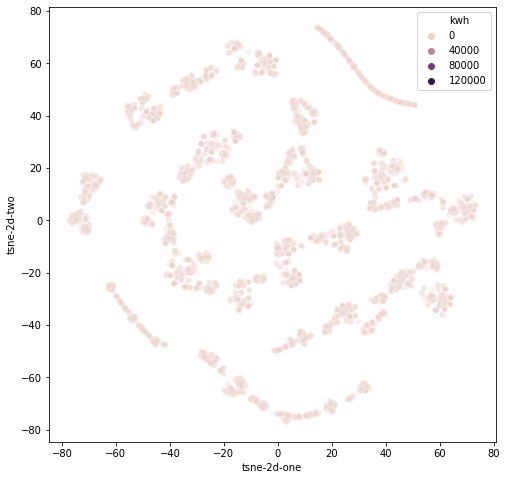

In [43]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
to_model_data_tsne = to_model_data.copy()

to_model_data_tsne['tsne-2d-one'] = X_embedded[:,0]
to_model_data_tsne['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(8,8))
sn.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="kwh",
    #palette=sn.color_palette("hls", 12),
    data=to_model_data_tsne,
    #legend="full",
    alpha=0.3
)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
#model = RandomForestRegressor(n_estimators=150)
model = RandomForestRegressor(verbose = 1)

param = {'max_features': ['auto', 'sqrt', 'log2'],
         'min_samples_split': np.arange(2,10)}

model_gs = GridSearchCV(model, param_grid = param, cv=5)

model_gs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestRegressor(verbose=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [55]:
model_gs.best_params_
model_gs.score(X_test, y_test)

{'fit_intercept': False}

-24162664667215.918

In [56]:
pd.crosstab(
    index= pd.cut(y_test, bins = list(np.arange(0, 300, step = 15))),
    columns = pd.cut(model_gs.predict(X_test), bins = list(np.arange(0, 300, step = 15))) 
)

col_0,"(0, 15]","(15, 30]","(45, 60]","(60, 75]","(75, 90]","(90, 105]","(105, 120]","(120, 135]","(135, 150]","(150, 165]","(165, 180]","(180, 195]","(195, 210]","(210, 225]","(225, 240]","(255, 270]"
kwh,,,,,,,,,,,,,,,,
"(0, 15]",2,2,62,107,49,11,19,10,11,59,56,46,19,3,1,0
"(15, 30]",0,0,4,2,6,1,6,2,2,5,5,1,0,0,0,0
"(30, 45]",0,0,3,8,3,4,4,3,2,8,3,0,0,1,0,0
"(45, 60]",0,0,4,6,7,8,8,2,6,8,7,1,5,0,0,0
"(60, 75]",0,0,0,5,1,2,6,1,2,6,6,2,0,1,0,0
"(75, 90]",0,0,0,3,0,3,5,4,7,14,11,5,0,0,0,0
"(90, 105]",0,0,0,2,0,0,1,5,2,15,15,3,3,1,1,0
"(105, 120]",0,0,3,3,1,1,6,5,3,16,20,4,2,1,1,0
"(120, 135]",0,0,0,0,0,0,4,2,3,20,25,13,1,1,0,0
